<a href="https://colab.research.google.com/github/nishantjha19/MachineLearningProject/blob/main/CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec



In [4]:
data= pd.read_csv('creditcard.csv')

**1.Display Top 5 Rows of The Dataset**

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


<h1>Code : Describing the Data</h1>

In [6]:
print(data.shape)
print(data.describe())

(53571, 31)
               Time            V1            V2            V3            V4  \
count  53571.000000  53571.000000  53571.000000  53571.000000  53571.000000   
mean   30004.864404     -0.243182      0.000586      0.691588      0.179664   
std    13302.545313      1.879598      1.639428      1.483708      1.393856   
min        0.000000    -56.407510    -72.715728    -32.965346     -5.172595   
25%    23663.500000     -0.994263     -0.573628      0.212411     -0.724005   
50%    34251.000000     -0.249472      0.078153      0.790661      0.189575   
75%    40127.000000      1.154647      0.732455      1.424778      1.061933   
max    46050.000000      1.960497     18.183626      4.101716     16.491217   

                 V5            V6            V7            V8            V9  \
count  53571.000000  53571.000000  53571.000000  53571.000000  53571.000000   
mean      -0.257872      0.102917     -0.119311      0.052872      0.094530   
std        1.411097      1.313136      

<h1>Code : Imbalance in the data</h1>

In [7]:
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0028642566973061012
Fraud Cases: 153
Valid Transactions: 53417


<h1>Code : Print the amount details for Fraudulent Transaction</h1>

In [9]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()


Amount details of the fraudulent transaction


count     153.000000
mean       97.616013
std       230.026856
min         0.000000
25%         1.000000
50%         7.610000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

<h1>Code : Print the amount details for Normal Transaction<h1>

In [10]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


count    53417.000000
mean        94.251260
std        252.353693
min          0.000000
25%          7.680000
50%         25.520000
75%         86.650000
max      12910.930000
Name: Amount, dtype: float64

<h1>Code : Plotting the Correlation Matrix</h1>

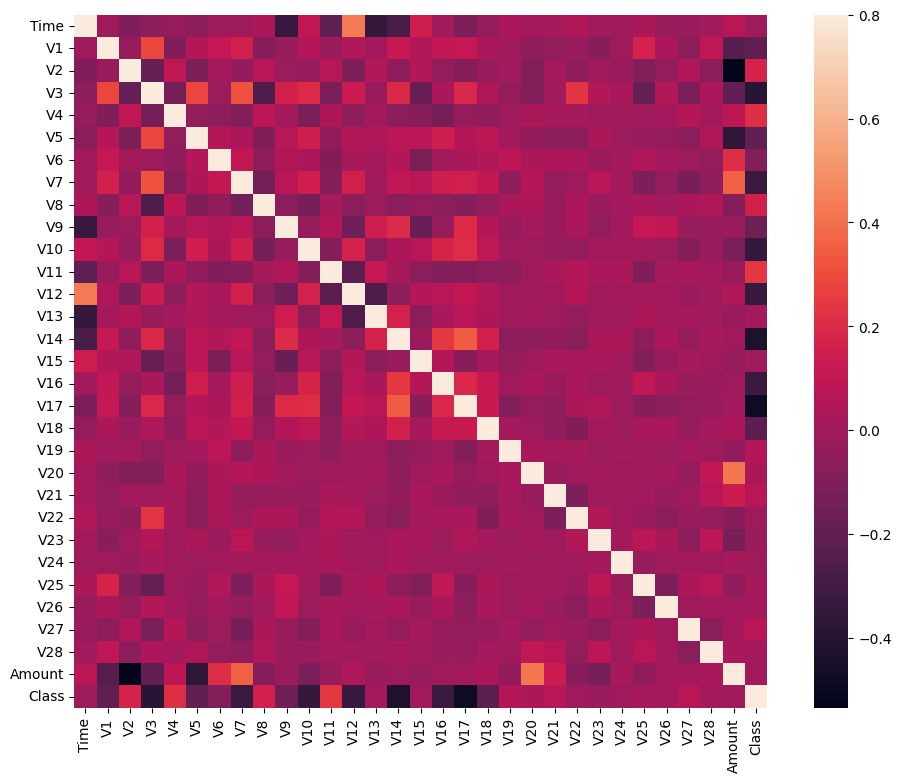

In [13]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

<h1>Code : Separating the X and the Y values

In [14]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(53571, 30)
(53571,)


<h1>Training and Testing Data Bifurcation

In [19]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

<h1>Code : Building a Random Forest Model using scikit learn

In [48]:

# Option 1: Remove rows with missing values

import pandas as pd

# Convert xTrain and yTrain to pandas DataFrames
df_xTrain = pd.DataFrame(xTrain)
df_yTrain = pd.DataFrame(yTrain)

# Drop rows with missing values
df_xTrain.dropna(inplace=True)
df_yTrain.dropna(inplace=True)

# Convert DataFrames back to numpy arrays
xTrain = df_xTrain.values
yTrain = df_yTrain.values

# Fit the model with the cleaned data
rfc.fit(xTrain, yTrain)

# Option 2: Impute missing values

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
xTrain_imputed = imputer.fit_transform(xTrain)

# Fit the model with the imputed data
rfc.fit(xTrain_imputed, yTrain)

# Make predictions
yPred = rfc.predict(xTest)

<ipython-input-48-080fa24a4c33>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(xTrain, yTrain)
<ipython-input-48-080fa24a4c33>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(xTrain_imputed, yTrain)


<h1>Code : Building all kinds of evaluating parameters

In [49]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9994400373308446
The precision is 1.0
The recall is 0.7692307692307693
The F1-Score is 0.8695652173913044
The Matthews correlation coefficient is0.8768119657128177


<h1>Code : Visualizing the Confusion Matrix

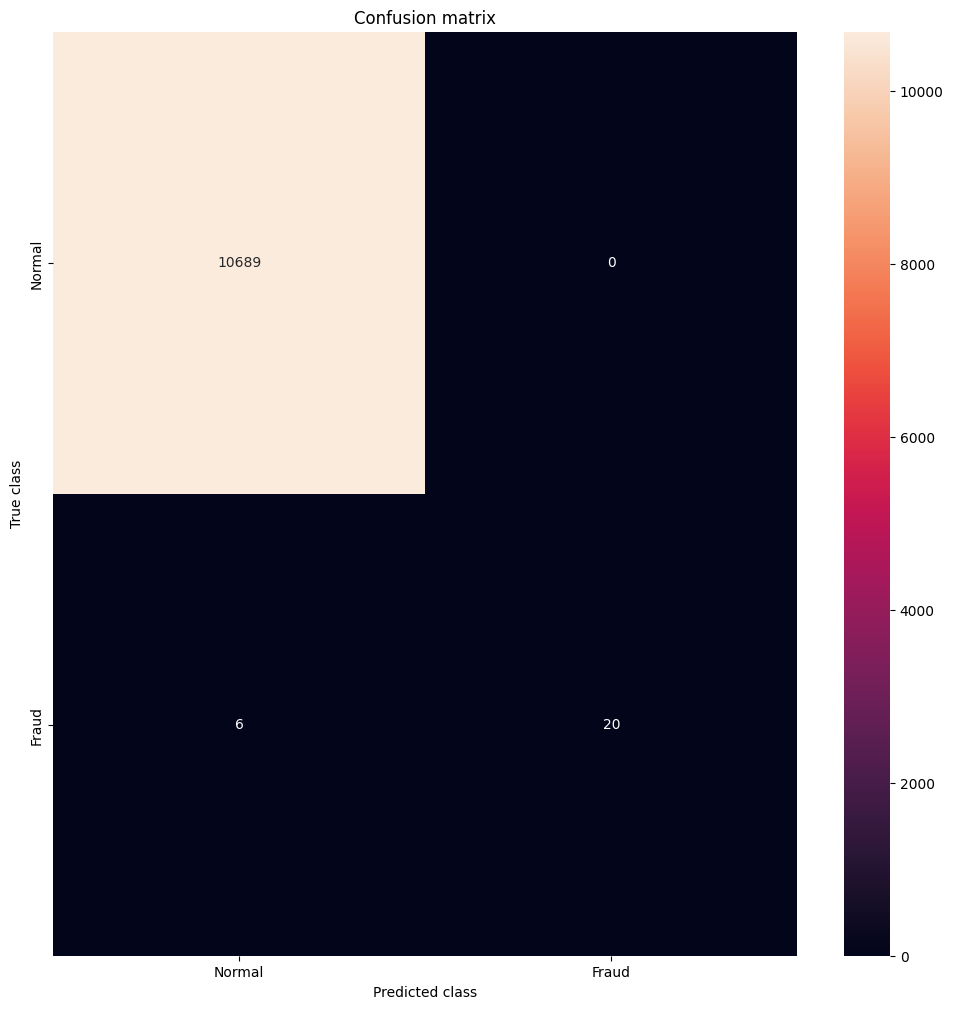

In [50]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()